### **Q1. Problem Statement: Regression Case Study**

Load the insurance.csv dataset into a DataFrame and by following the given tasks, build a good linear regression model.

1. Load the given dataset into a DataFrame

2. Find null values and drop them if it is there

3. Find an Outlier and solve it using the interquartile range (IQR) method

4. Do one-hot encoding for categorical features

5. Split data into X (independent features) and Y(dependent features)

6. Build a simple Linear Regression model and print the residual plot and R2 sore for test data(take test size as 20%)

7. Find variance inflation factor and build a new model and note the R2 score and print summary

8. Do Ridge and Lasso regression and print R2 score for all models.

### **Q1. Import necessary Libraries**

In [1]:
import numpy as np  # Numerical operations  
import pandas as pd  # Data handling  
import matplotlib.pyplot as plt  # Plotting  
import seaborn as sns  # Statistical visualization  

from sklearn.model_selection import train_test_split  # Splitting data  
from statsmodels.api import add_constant, OLS  # Regression analysis  


In [2]:
import warnings
warnings.simplefilter('ignore')  # Ignore warnings

### **Q2. Load the dataset**

In [3]:
data=pd.read_csv("insurance.csv") 
data.head() 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.tail() 

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
data.sample(8)

,age,sex,bmi,children,smoker,region,charges
1026,19,male,26.030,1,yes,northwest,16450.89470
766,47,male,32.300,1,no,southwest,8062.76400
1214,27,female,31.255,1,no,northwest,3956.07145
134,20,female,28.785,0,no,northeast,2457.21115
1083,32,male,31.500,1,no,southwest,4076.49700
1267,24,male,31.065,0,yes,northeast,34254.05335
682,39,male,35.300,2,yes,southwest,40103.89000
804,23,male,26.510,0,no,southeast,1815.87590


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
data.shape

(1338, 7)

In [9]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### **Q4. Find Null values**

In [10]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

- There is no null value in the dataset


### **Q5. Check Information about the data**

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### **Q6. Using seaborn print Box-Plot of dependent variable for outlier analysis**

<Axes: >

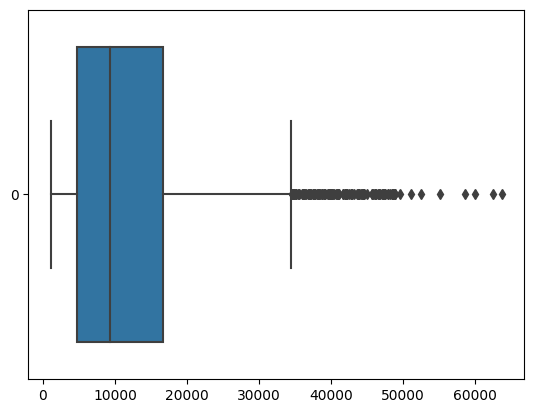

In [12]:
new_data = data.copy()  # Creates a duplicate of 'data' to avoid modifying the original dataset  
sns.boxplot(new_data['charges'],orient="h") # Dependent variable

### **Q7. Deal with outlier using IQR Method**

In [13]:
# Outlier treatment using the IQR (Interquartile Range) Method  
hp = sorted(new_data['charges'])  # Sorting the 'charges' column values  
q1, q3 = np.percentile(hp, [25, 75])  # Calculating the 25th (Q1) and 75th (Q3) percentiles  
lower_bound = q1 - (1.5 * (q3 - q1))  # Calculating the lower bound for outlier detection  
upper_bound = q3 + (1.5 * (q3 - q1))  # Calculating the upper bound for outlier detection  

below = new_data['charges'] > lower_bound  # Boolean mask for values above lower bound  
above = new_data['charges'] < upper_bound  # Boolean mask for values below upper bound  
new_data = new_data[below & above]  # Keeping only non-outlier data points  


In [14]:
new_data.shape

(1199, 7)

In [15]:
new_data.describe()

,age,bmi,children,charges
count,1199.000000,1199.000000,1199.000000,1199.000000
mean,38.989992,30.095200,1.084237,9927.753402
std,14.068040,6.010551,1.214304,7241.158309
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,25.800000,0.000000,4408.695900
50%,39.000000,29.735000,1.000000,8410.046850
75%,51.000000,33.820000,2.000000,12953.594600
max,64.000000,53.130000,5.000000,34472.841000


### **Q8. Using seaborn print dist-plot**

In [16]:
new_data.transpose() # # Swaps rows and columns

,0,1,2,3,4,5,6,7,8,9,...,1328,1329,1330,1331,1332,1333,1334,1335,1336,1337
age,19,18,28,33,32,31,46,37,37,60,...,23,52,57,23,52,50,18,18,21,61
sex,female,male,male,male,male,female,female,female,male,female,...,female,male,female,female,female,male,female,female,female,female
bmi,27.9,33.77,33.0,22.705,28.88,25.74,33.44,27.74,29.83,25.84,...,24.225,38.6,25.74,33.4,44.7,30.97,31.92,36.85,25.8,29.07
children,0,1,3,0,0,0,1,3,2,0,...,2,2,2,0,3,3,0,0,0,0
smoker,yes,no,no,no,no,no,no,no,no,no,...,no,no,no,no,no,no,no,no,no,yes
region,southwest,southeast,southeast,northwest,northwest,southeast,southeast,northwest,northeast,northwest,...,northeast,southwest,southeast,southwest,southwest,northwest,northeast,southeast,southwest,northwest
charges,16884.924,1725.5523,4449.462,21984.47061,3866.8552,3756.6216,8240.5896,7281.5056,6406.4107,28923.13692,...,22395.74424,10325.206,12629.1656,10795.93733,11411.685,10600.5483,2205.9808,1629.8335,2007.945,29141.3603


### **Q9. Create dummy variables for One Hot Encoding**

In [17]:
# dummy varible creation
# Let's create dummy variables out of the categorical variables
fullRaw2=pd.get_dummies(new_data,dtype=int).copy()
print(fullRaw2.shape)
fullRaw2.head()

(1199, 12)


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


### **Q10. Seprate dependent & independent variable into X & Y then split into train & test**

In [18]:
# Extract independent variables (Xs) & dependent variables (Ys) into separate data objects
x=fullRaw2.drop(["charges"],axis=1).copy()
y=fullRaw2["charges"].copy()

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(959, 11)
(240, 11)
(959,)
(240,)


### **Model Building**

### **Step 11. Importing sklearn library and call LinearRegression then fit on train data**

In [19]:
from sklearn.linear_model import LinearRegression
model=LinearRegression().fit(x_train,y_train)
pred = model.predict(x_test)


### **Step 12. Evaluate R2 score and adjusted R2 for model on test data**

In [21]:
from sklearn import *
score1=model.score(x_test,y_test) # coefficient of determination (R - square)
score1

0.6192966378869834

In [22]:
# Adjusted R square
1 - (1-model.score(x_test,y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.6009293704166185

### **Step 13. Print Residual plot**

Text(0, 0.5, 'Residuals')

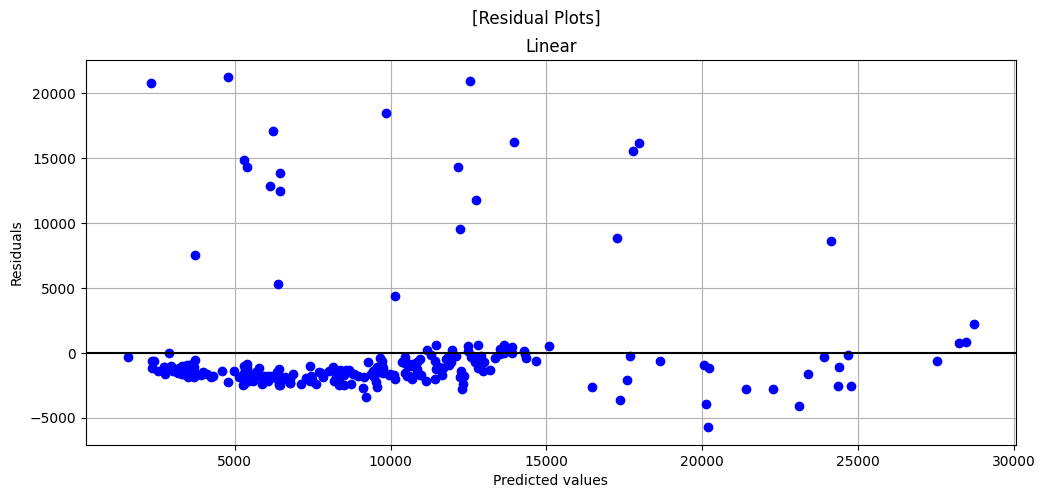

In [27]:
fig, ax = plt.subplots(1, 1, sharex=False, sharey=False)
fig.suptitle('[Residual Plots]')
fig.set_size_inches(12, 5)
ax.plot(model.predict(x_test), np.array(y_test - model.predict(x_test)), 'bo')
ax.axhline(y=0, color='k')
ax.grid()
ax.set_title('Linear')
ax.set_xlabel('Predicted values')
ax.set_ylabel('Residuals')


smoker_no          -7233.081463
region_southwest    -696.039503
region_southeast    -268.320499
sex_male            -163.524305
bmi                   58.002871
region_northwest     157.915421
sex_female           163.524305
age                  241.333017
children             407.144465
region_northeast     806.444581
smoker_yes          7233.081463
dtype: float64


<Axes: title={'center': 'Model Coefficients'}>

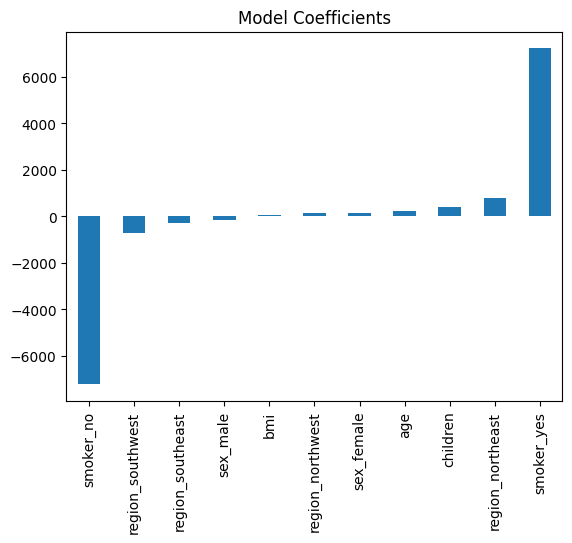

In [30]:
# Visualizing model coefficients
predictors=x_train.columns
coef = pd.Series(model.coef_,predictors).sort_values()
print(coef)
coef.plot(kind='bar', title='Model Coefficients')

### **Step 14. Finding Variance inflation factor**

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns

vif["VIF Factor"] # any value of VIF Factor greater than 10 creates a problem in my model


0     1.020381
1     1.167918
2     1.003027
3          inf
4          inf
5          inf
6          inf
7          inf
8          inf
9          inf
10         inf
Name: VIF Factor, dtype: float64

### **Step 15. Removing columns having high variance inflation factor**

In [ ]:
x=add_constant(x)
tempMaxVIF = 5
maxVIF=5
trainXCopy = x.copy()
counter=1
highVIFColumnNames=[]

while (tempMaxVIF >= maxVIF):
    
   #  Create an empty temporary df to store VIF values
   tempVIFdf=pd.DataFrame()

   # Calculate VIF using list comprehension
   tempVIFdf["VIF"]=[variance_inflation_factor(trainXCopy.values,i) for i in range(trainXCopy.shape[1])]

   # Create a new column "Column_Name" to storethe col names against the VIF values from list comprehension
   tempVIFdf["Column_Name"]=trainXCopy.columns

   # Drop NA rows from the df - if there is some calculation error resulting in NAs
   tempVIFdf=tempVIFdf.dropna()

   # Sort the df based on VIF values, then pick the most column name (which has the highest VIF)    
   tempColumnName=tempVIFdf.sort_values(["VIF"])[-1:]["Column_Name"].values[0]

   # Store the max VIF values in tempMaxVIF
   tempMaxVIF=tempVIFdf.sort_values(["VIF"])[-1:]["VIF"].values[0]

   if(tempMaxVIF >= maxVIF): # this condition will ensure that columns haveong VIF lower than 5 are NOT dropped

      print(counter)
      print(tempColumnName)

      # Remove the highest VIF valued "column" from trainxcopy. as the loop continues this step will keep removing
      trainXCopy=trainXCopy.drop([tempColumnName],axis=1)
      highVIFColumnNames.append(tempColumnName) # here we are making list of deleting variables
   counter=counter+1


1
region_southwest
2
smoker_yes
3
sex_male
4
const
5
bmi
6
age


In [ ]:
# Now we find out that 